OCR = Optical character recognition
Permet de reconnaitre des textes sur une image.

Installation :
Plusieurs choses sont nécéssaires ( c'est plus compliqué à installer qu'à utiliser)
-> Visual Studio 14.0 ou + (Build tools est suffisant)
-> la toute dernière version de numpy (pip install --user -U numpy)
-> télécharger git

Ensuite, il faut entrer les commandes suivantes
pip install --user paddleocr

pip install --user paddlepaddle 
( si vous avez un gpu installez directement paddlepaddle-gpu)

et pour finir :
!git clone https://github.com/PaddlePaddle/PaddleOCR


ça peut prendre un peu de temps

toutes les infos/docs :
https://github.com/PaddlePaddle/PaddleOCR

In [ ]:
# pour des raisons de licence on ne peut pas faire import paddleocr 
from paddleocr import PaddleOCR, draw_ocr 
from matplotlib import pyplot as plt 
# pip install opencv-python 
# pip install opencv-contrib-python
import cv2 
import os 
import pandas as pd

In [2]:
# configuration du model d'OCR, 
# lang='fr' pour le français
# fonctionne pour 80 langues 
ocr_model = PaddleOCR(lang='fr')

Namespace(help='==SUPPRESS==', use_gpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\Administrateur/.paddleocr/2.4\\ocr\\det\\en\\en_ppocr_mobile_v2.0_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='box', det_pse_scale=1, rec_algorithm='CRNN', rec_model_dir='C:\\Users\\Administrateur/.paddleocr/2.4\\ocr\\rec\\latin\\latin_ppocr_mobile_v2.0_rec_infer', rec_image_shape='3, 32, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='C:\\Users\\Administrateur\\AppData\\Roaming\\Python\\Python39\\site-p

In [3]:
# chemin vers l'image
img_path = r"C:\Users\Administrateur\Desktop\deep_learning\img_detect\blood2.png"

[2022/02/28 00:33:26] matplotlib.font_manager DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[2022/02/28 00:33:26] matplotlib.font_manager DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
[2022/02/28 00:33:26] matplotlib.font_manager DEBUG: findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
[2022/02/28 00:33:26] matplotlib.font_manager DEBUG: findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
[2022/02/28 00:33:26] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
[2022/02/28 00:33:26] matplotlib.font_manager DEBUG: findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
[2022/02/28 00:33:26] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDispl

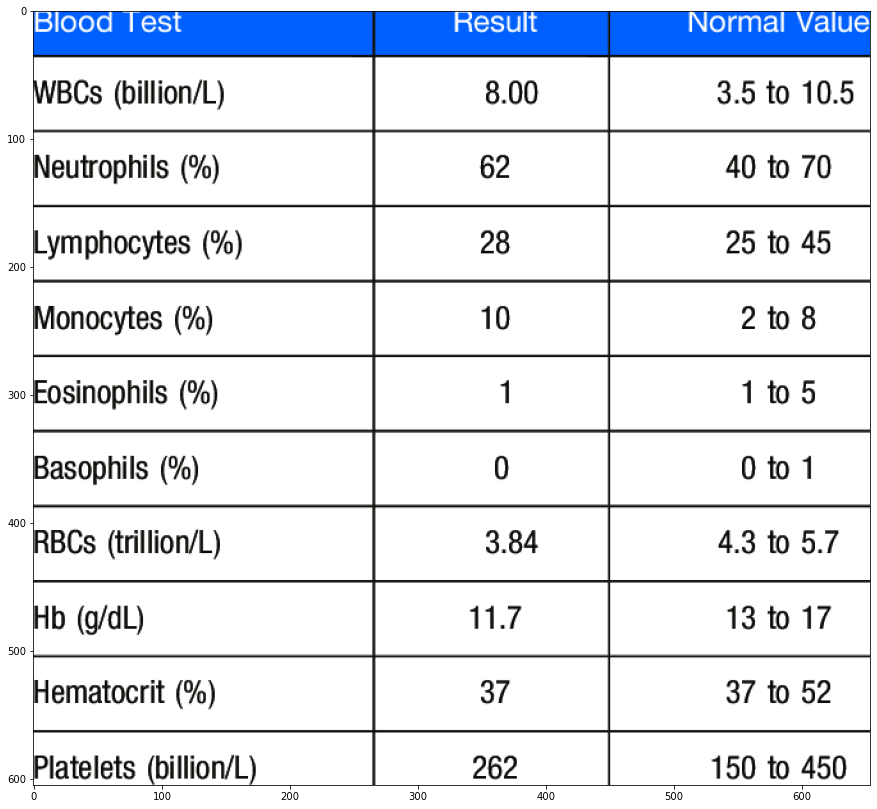

In [4]:
# Voici l'image 
img = cv2.imread(img_path)
plt.figure(figsize=(15,15))
plt.imshow(img)

In [5]:
# definit l'alphabet latin
font_path = os.path.join(r'C:\Users\Administrateur\PaddleOCR\doc\fonts\latin.ttf')

# load image
img = cv2.imread(img_path)

# on récupère la hauteur et la largeur de l'image
height = img.shape[0]
width = img.shape[1]

# on va couper l'image en 3 parties
width_cutoff = width // 3
left = img[:, :width_cutoff]
middle = img[:, width_cutoff:width_cutoff*2]
right = img[:, width_cutoff*2:]

#left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
#middle = cv2.cvtColor(middle, cv2.COLOR_BGR2RGB)
#right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

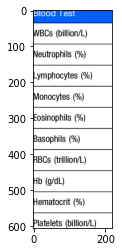

In [6]:
# notre image est découpé en 3
plt.imshow(left)
plt.show()

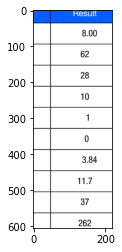

In [7]:
plt.imshow(middle)
plt.show()

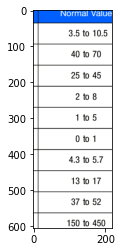

In [8]:
plt.imshow(right)
plt.show()

In [9]:
img_list = [left, middle, right]

In [10]:
# création du model
# on peut ajouter en argument :
# det=False -> fait uniquement de la recognition
# rec=False -> fait uniquement de la detection
img_list = [left, middle, right]

def ocr_read(x):
    series_list = []
    for item in x:
        result = ocr_model.ocr(item)
        texts = [res[1][0] for res in result]
        texts_sr = pd.Series(texts)
        series_list.append(texts_sr)
    df = pd.concat(series_list, axis=1)
    return df

In [11]:
df = ocr_read(img_list)

[2022/02/28 00:33:27] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/02/28 00:33:27] root DEBUG: dt_boxes num : 11, elapse : 0.2403559684753418
[2022/02/28 00:33:28] root DEBUG: rec_res num  : 11, elapse : 0.3570442199707031
[2022/02/28 00:33:28] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/02/28 00:33:28] root DEBUG: dt_boxes num : 11, elapse : 0.18254566192626953
[2022/02/28 00:33:28] root DEBUG: rec_res num  : 11, elapse : 0.150162935256958
[2022/02/28 00:33:28] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/02/28 00:33:28] root DEBUG: dt_boxes num : 11, elapse : 0.1506025791168213
[2022/02/28 00:33:28] root DEBUG: rec_res num  : 11, elapse : 0.32213854789733887


In [12]:
# on obtient une dataframe avec toutes les informations
df

,0,1,2
0,Bloodlest,Result,normalvalue
1,WBCS(billion/l),8.00,3.5to10.5
2,Neutrophils(%),62,40to70
3,ymphocytes(%),26,25t045
4,Monocytes(%),10,2108
5,osinophils(%),1,1t05
6,Basophils(9),O,0101
7,RBCS(trillion/l),3.84,4.3to5.7
8,Hb(g/dl),11.7,13017
9,Hematocrit(9),37,37t052


In [13]:
# mais seulement la colonne du milieu nous intéresse donc

df_middle = ocr_read([middle])

[2022/02/28 00:33:28] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/02/28 00:33:29] root DEBUG: dt_boxes num : 11, elapse : 0.1760408878326416
[2022/02/28 00:33:29] root DEBUG: rec_res num  : 11, elapse : 0.182509183883667


In [14]:
# tout semble bon sauf pour le row 6, où le model lit un "O" au lieu de "0"
# un peu nettoyage suffit :)
df_middle

,0
0,Result
1,8.00
2,62
3,26
4,10
5,1
6,O
7,3.84
8,11.7
9,37


In [15]:
df_middle.T

,0,1,2,3,4,5,6,7,8,9,10
0,Result,8.00,62,26,10,1,O,3.84,11.7,37,262
